![Water Quality](https://plus.unsplash.com/premium_photo-1710628263718-367b1cf5828f?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

## **Table of Contents and Deliverables**

1. <a href="#abstract" style="color:purple;"><b>Section 1:</b> Abstract</a>

2. <a href="#project-background" style="color:purple;"><b>Section 2:</b> Project Background</a>

3. <a href="#project-objective" style="color:purple;"><b>Section 3:</b> Project Objective</a>

4. <a href="#input-data-description" style="color:purple;"><b>Section 4:</b> Input Data Description</a>
   - <a href="#step-1-imports-and-necessary-installs" style="color:purple;">Step 1: Imports and Necessary Installs</a>
   - <a href="#step-2-actual-dataset" style="color:purple;">Step 2: Actual Dataset</a>

5. <a href="#data-cleaning" style="color:purple;"><b>Section 5:</b> Data Cleaning</a>
   - <a href="#step-1-dropping-nas-merging-with-other-datasets-and-ensuring-proper-data-types" style="color:purple;">Step 1: Dropping NAs, Merging with Other Datasets, and Ensuring Proper Data Types</a>
   - <a href="#step-2-unit-consistency" style="color:purple;">Step 2: Unit Consistency</a>
   - <a href="#step-3-time-zone-consistency" style="color:purple;">Step 3: Time Zone Consistency</a>
   - <a href="#step-4-feature-engineering" style="color:purple;">Step 4: Feature Engineering</a>
   - <a href="#step-5-pivoting-for-each-prediction-approach" style="color:purple;">Step 5: Pivoting for Each Prediction Approach</a>
     - <a href="#substep-1-biological-dataframe" style="color:purple;">Substep 1: Biological Dataframe</a>
     - <a href="#substep-2-water-quality-dataframe" style="color:purple;">Substep 2: Water Quality DataFrame</a>
     - <a href="#substep-3-do-dataframe" style="color:purple;">Substep 3: DO Dataframe</a>

6. <a href="#eda" style="color:purple;"><b>Section 6:</b> Data Summary and Exploratory Data Analysis</a>
   - <a href="#part-1-do-eda" style="color:purple;">Part 1: DO EDA</a>

7. <a href="#forecasting-modeling" style="color:purple;"><b>Section 7:</b> Forecasting and Prediction Modeling</a>
   - <a href="#core-prediction" style="color:purple;"><b>Subsection 7.1:</b> Core Prediction Question</a>
   - <a href="#supporting-prediction" style="color:purple;"><b>Subsection 7.2:</b> Supporting Question</a>
     - <a href="#part-1-missing-value-imputation-interpolation" style="color:purple;">Part 1: Missing Value Imputation/Interpolation</a>
     - <a href="#part-2-train-test-split" style="color:purple;">Part 2: Train-Test Split</a>
     - <a href="#part-3-models" style="color:purple;">Part 3: Models</a>
       - <a href="#model-1-linear-regression" style="color:purple;">Model 1: Linear Regression</a>
       - <a href="#model-2-xgboost" style="color:purple;">Model 2: XGBoost</a>
       - <a href="#model-3-random-forest" style="color:purple;">Model 3: Random Forest</a>
     - <a href="#part-4-evaluation-visualization" style="color:purple;">Part 4: Evaluation & Visualization</a>
   - <a href="#temporal-prediction" style="color:purple;"><b>Subsection 7.3:</b> Temporal Prediction Question</a>

8. <a href="#conclusions" style="color:purple;"><b>Section 8:</b> Interpretation and Conclusions</a>

9. <a href="#references" style="color:purple;"><b>Section 9:</b> References</a>


---

## <a id="abstract"></a>Section 1: Abstract

---

## <a id="project-background"></a>Section 2: Project Background

---

## <a id="project-objective"></a>Section 3: Project Objective


---

## <a id="input-data-description"></a>Section 4: Input Data Description

### <a id="step-1-imports-and-necessary-installs"></a>Step 1: Imports and Necessary Installs

Run the following cell to install and import all required libraries.

In [1]:
# Run the following cell for all imports/libraries.

!pip install xgboost
import pandas as pd
import zipfile
import zipfile
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

### <a id="step-2-actual-dataset"></a>Step 2: Actual Dataset

** Include description of WQ Data portal**

In [2]:
# We employ the following Zipfile code to load a massive biological result zip dataset. The dataset is very massive, so we zipped it.

zip_file_path = "final_data/biologicalresult.zip"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    
    csv_file_name = [name for name in file_names if name.endswith('.csv')][0]
    
    with z.open(csv_file_name) as f:
        df_bio_metadata = pd.read_csv(f, low_memory=False)

filtered_df_bio = df_bio_metadata[[
    "OrganizationIdentifier", 
    "ActivityIdentifier",
    "ActivityStartDate", 
    "ActivityStartTime/Time",	
    "ActivityStartTime/TimeZoneCode",
    "ActivityEndDate", 
    "CharacteristicName", 
    "ResultMeasureValue",
    "ResultMeasure/MeasureUnitCode", 
    "MeasureQualifierCode",
    "ResultStatusIdentifier",
    "ProjectIdentifier",
    "MonitoringLocationIdentifier"
    
]]

filtered_df_bio.head()

,OrganizationIdentifier,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,ResultStatusIdentifier,ProjectIdentifier,MonitoringLocationIdentifier
0,21CABCH,21CABCH-ENCINAL BEACH SOUTH-4/29/2013,2013-04-29,NaN,NaN,NaN,Enterococcus,3.3,MPN/100mL,NaN,Final,CA580154;EPABEACH,21CABCH-ENCINAL BEACH SOUTH
1,CALWR_WQX,CALWR_WQX-BL13B655594,2013-03-19,14:45:00,PST,NaN,Carbon tetrachloride,0,ug/L,NaN,Accepted,2,CALWR_WQX-KB001638
2,21CABCH,21CABCH-Crown Bird Sanctuary-10/3/2013,2013-10-03,NaN,NaN,NaN,Total Coliform,110,MPN/100mL,NaN,Final,CA549911;EPABEACH,21CABCH-Crown Bird Sanctuary
3,CEDEN,CEDEN--2145862758,2013-05-08,10:10:00,PST,NaN,Count,14,count,NaN,Final,ACCWP_CSM_WY2013,CEDEN-204R00334
4,21CABCH,21CABCH-Crown Windsurfer Corner-4/29/2013,2013-04-29,NaN,NaN,NaN,Total Coliform,1,MPN/100mL,NaN,Final,CA549911;EPABEACH,21CABCH-Crown Windsurfer Corner


In [3]:
zip_file_path = "final_data/project.zip"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    
    csv_file_name = [name for name in file_names if name.endswith('.csv')][0]
    
    with z.open(csv_file_name) as f:
        df_project = pd.read_csv(f, low_memory=False)

df_project.head()

,OrganizationIdentifier,OrganizationFormalName,ProjectIdentifier,ProjectName,ProjectDescriptionText,SamplingDesignTypeCode,QAPPApprovedIndicator,QAPPApprovalAgencyName,ProjectFileUrl,ProjectMonitoringLocationWeightingUrl
0,CEDEN,California State Water Resources Control Board,WES_Sep14-Feb15,"WES Order R5-2014-0002, Jun 15th 2015, Sep14-F...",Westside San Joaquin River Watershed Coalition...,NaN,NaN,NaN,NaN,NaN
1,CEDEN,California State Water Resources Control Board,ACCWP_CSM_WY2012,ACCWP Creek Status Monitoring in WY2012,Alameda Countywide Clean Water Program Creek S...,NaN,NaN,NaN,NaN,NaN
2,CEDEN,California State Water Resources Control Board,17RMP2MC,2017 RMP Margins Special Study,This study will provide an unbiased spatially ...,NaN,NaN,NaN,NaN,NaN
3,CEDEN,California State Water Resources Control Board,RWB2_Ref_2010,RWB2 Reference Study Monitoring 2010,RWB2 Reference Study Monitoring 2010,NaN,NaN,Not Recorded,NaN,NaN
4,CEDEN,California State Water Resources Control Board,RWB2_RMC_2013,RWB2 Regional Monitoring Coalition Reference 2013,18 non-urban probabilistic sites (perennial an...,NaN,NaN,Not Recorded,NaN,NaN


In [4]:
zip_file_path = "final_data/station.zip"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    
    csv_file_name = [name for name in file_names if name.endswith('.csv')][0]
    
    with z.open(csv_file_name) as f:
        df_site = pd.read_csv(f, low_memory=False)

df_site.head()

,OrganizationIdentifier,OrganizationFormalName,MonitoringLocationIdentifier,MonitoringLocationName,MonitoringLocationTypeName,MonitoringLocationDescriptionText,HUCEightDigitCode,DrainageAreaMeasure/MeasureValue,DrainageAreaMeasure/MeasureUnitCode,ContributingDrainageAreaMeasure/MeasureValue,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,USGS-CA,USGS California Water Science Center,USGS-11172945,ALAMEDA C AB DIV DAM NR SUNOL CA,Stream,NaN,18050004,33.3,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,USGS California Water Science Center,USGS-11172955,ALAMEDA C BL DIV DAM NR SUNOL CA,Stream,NaN,18050004,34.9,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,USGS California Water Science Center,USGS-11173500,CALAVERAS C NR SUNOL CA,Stream,NaN,18050004,98.8,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,USGS California Water Science Center,USGS-11173510,ALAMEDA C BL CALAVERAS C NR SUNOL CA,Stream,NaN,18050004,139.0,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,USGS California Water Science Center,USGS-11173575,ALAMEDA C BL WELCH C NR SUNOL CA,Stream,NaN,18050004,149.0,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


---

## <a id="data-cleaning"></a>Section 5: Data Cleaning

### <a id="step-1-dropping-nas-merging-with-other-datasets-and-ensuring-proper-data-types"></a>Step 1: Dropping NAs, Merging with Other Datasets, and Ensuring Proper Data Types

In [5]:
# Data Cleaning to drop Nans, and merging

filtered_df_bio = filtered_df_bio.dropna(subset=["ResultMeasureValue"])
filtered_df_bio_joined = filtered_df_bio.merge(df_project, how = "left", left_on = "ProjectIdentifier", right_on = "ProjectIdentifier")
filtered_df_bio_joined = filtered_df_bio_joined.merge(df_site, how = "left", left_on = "MonitoringLocationIdentifier", right_on = "MonitoringLocationIdentifier")
filtered_df_bio_joined['ResultMeasureValue'] = pd.to_numeric(filtered_df_bio_joined['ResultMeasureValue'], errors='coerce')
filtered_df_bio_joined.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,21CABCH,21CABCH-ENCINAL BEACH SOUTH-4/29/2013,2013-04-29,NaN,NaN,NaN,Enterococcus,3.3,MPN/100mL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1,CALWR_WQX,CALWR_WQX-BL13B655594,2013-03-19,14:45:00,PST,NaN,Carbon tetrachloride,0.0,ug/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
2,21CABCH,21CABCH-Crown Bird Sanctuary-10/3/2013,2013-10-03,NaN,NaN,NaN,Total Coliform,110.0,MPN/100mL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
3,CEDEN,CEDEN--2145862758,2013-05-08,10:10:00,PST,NaN,Count,14.0,count,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
4,21CABCH,21CABCH-Crown Windsurfer Corner-4/29/2013,2013-04-29,NaN,NaN,NaN,Total Coliform,1.0,MPN/100mL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET


### <a id="step-2-unit-consistency"></a>Step 2: Unit Consistency

In [6]:
# A look at how many different unit measurements there are to measure a certain Characteristic!

unit_check = filtered_df_bio_joined.groupby("CharacteristicName")["ResultMeasure/MeasureUnitCode"].apply(lambda x: x.dropna().unique())

multiple_units = unit_check[unit_check.apply(len) > 1]

print("Multiple unit types of measurement:")
for characteristic, units in multiple_units.items():
    print(f"- {characteristic}: {', '.join(units)}")

Multiple unit types of measurement:
- .beta.-Hexachlorocyclohexane: pg/L, % recovery
- 1-Methylnaphthalene: pg/L, ng/g, ug/kg
- 1-Methylphenanthrene: pg/L, ng/g
- 2,3',4,4'-Tetrachlorobiphenyl: pg/L, ng/g
- 2,6-Dimethylnaphthalene: pg/L, ng/g, ug/kg
- 2-Fluorobiphenyl: % recovery, %
- 2-Methylnaphthalene: pg/L, ng/g, ug/kg
- Acenaphthene: pg/L, ng/g
- Acenaphthylene: pg/L, % recovery, ng/g
- Aldrin: pg/L, % recovery, ug/L
- Alkalinity, total: mg/L, mg/l CaCO3**
- Aluminum: mg/L, ug/g, %, ug/l
- Ammonia: mg/L, mg N/l******
- Ammonia and ammonium: mg/l as N, mg/l NH4
- Anthracene: pg/L, ng/g, ug/kg
- Anthraquinone: ug/l, ug/kg
- Antimony: mg/L, ug/g, ug/L, mg/kg, ug/l
- Arsenic: mg/L, ug/L, ug/g, mg/kg, ug/l
- Ash Free Dry Mass: g/m2, mg/L
- Barium: mg/L, ug/L, mg/kg, ug/l
- Bed sediment particle size: %, g
- Bedload sediment flux: tons/day, ton/d/ft
- Bedload sediment particle size: %, g
- Benzo(b)fluoranthene: pg/L, ng/g, ug/kg
- Benzo[a]pyrene: pg/L, % recovery, ng/g, ug/l, ug/kg
- Be

In [7]:
def unit_convert(df, col_units, col_measure, unit_before, unit_after, conversion_function, char_column, char_to_convert = None):
    '''
    Function Author: Vishali Vallioor
    Converts units of measurement for specified rows in a DataFrame given. Used in this case for WQ dataset.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data to convert.
        col_units (str): Column name for units of measurement.
        col_measure (str): Column name for measure values.
        unit_before (str): Unit to convert from.
        unit_after (str): Unit to convert to.
        conversion_function (function): Function to apply for the conversion. Can use lambda!
        char_column (str): Column name for characteristic filtering.
        char_to_convert (list or None): Specific characteristics to filter for conversion.

    Returns:
        None: Modifies the DataFrame in place.
    """
    '''
    if char_to_convert is not None:
        row_indices_to_convert = (
            (filtered_df_bio_joined[char_column].isin(char_to_convert)) &
            (filtered_df_bio_joined[col_units] == unit_before)
        )

    row_indices_to_convert = df[col_units] == unit_before

    df.loc[row_indices_to_convert, col_measure] = conversion_function(df.loc[row_indices_to_convert, col_measure])
    df.loc[row_indices_to_convert, col_units] = unit_after

Applying the Function as per defined above:

In [8]:
df_arg = filtered_df_bio_joined.copy()
unit_arg = "ResultMeasure/MeasureUnitCode"
meas_arg = "ResultMeasureValue"
char_arg = "CharacteristicName"


# ug/L to mg/kg case scenario
# Assumption: water has a density of 1 kg/L
unit_convert(df_arg, unit_arg, meas_arg, "ug/l", "mg/kg", (lambda x: x/1000), char_arg)

# % to mg/kg case scenario
# Multiplying by 10,000
unit_convert(df_arg, unit_arg, meas_arg, "%", "mg/kg", (lambda x: x*1000), char_arg)

# ng/L to mg/kg case scenario
unit_convert(df_arg, unit_arg, meas_arg, "ng/l", "mg/kg", lambda x: x / 1_000_000, "CharacteristicName")

# ft to m case scenario
# Multiplying by 0.3048
unit_convert(df_arg, unit_arg, meas_arg, "ft", "m", lambda x: x * 0.3048, "CharacteristicName")

# ft3/s to m3/s case scenario
# Multiplying by 0.0283168
unit_convert(df_arg, unit_arg, meas_arg, "ft3/s", "m3/sec", lambda x: x * 0.0283168, "CharacteristicName")

# Multiplying by 1.29 (example molecular weight conversion)
unit_convert(df_arg, unit_arg, meas_arg, "mg/l as N", "mg/l NH4", lambda x: x * 1.29, char_arg)


unit_convert(df_arg, unit_arg, meas_arg, "mg/kg", "ug/kg", lambda x: x * 1000, char_arg, char_to_convert=["Fipronil Sulfone", "Fluoranthene", "Pyrene"])

unit_convert(df_arg, unit_arg, meas_arg, "mg/l", "mg/kg", lambda x: x * 1, char_arg, char_to_convert=["Calcium", "Magnesium", "Potassium", "Sodium"])

unit_convert(df_arg, unit_arg, meas_arg, "ug/kg", "mg/kg", lambda x: x / 1000, char_arg, char_to_convert=[
    "Azoxystrobin", "Benzo[a]pyrene", "Clothianidin", "Dithiopyr", "Diuron",
    "Etoxazole", "Fipronil Sulfide", "Fluridone", "Hexazinone", "Methoxyfenozide",
    "Oxyfluorfen", "Pendimethalin", "Piperonyl butoxide", "Propiconazole",
    "Tin", "Uranium"])

# Multiplying by 1.29 (example molecular weight conversion, for both.)
unit_convert(df_arg, unit_arg, meas_arg, "mg/l NH4", "mg/l asNO3", lambda x: x * 4.43, char_arg, char_to_convert=["Nitrate"])

# Convert % by wt to mg/kg for Organic Carbon
unit_convert(df_arg, unit_arg, meas_arg, "% by wt", "mg/kg", lambda x: x * 10000, char_arg, char_to_convert=["Organic carbon"])

# Convert mg/l as PO4 to mg/l as P for Orthophosphate
unit_convert(df_arg, unit_arg, meas_arg, "mg/l asPO4", "mg/l as P", lambda x: x * 0.326, char_arg, char_to_convert=["Orthophosphate"])

# Convert % saturation to mg/l for Oxygen
unit_convert(df_arg, unit_arg, meas_arg, "% saturatn", "mg/l", lambda x: x * 0.1, char_arg, char_to_convert=["Oxygen"])

# Standardize the units for the SSC
unit_convert(df_arg, unit_arg, meas_arg, "mg/l", "mg/kg", lambda x: x, char_arg, char_to_convert=["Suspended Sediment Concentration (SSC)"])

# Convert solids to consistent unit, using multipler of 73558.8
unit_convert(df_arg, unit_arg, meas_arg, "tons/ac ft", "mg/l", lambda x: x * 73558.8, char_arg, char_to_convert=["Total dissolved solids"])

# Consistent units for UV
unit_convert(df_arg, unit_arg, meas_arg, "units/cm", "L/mgDOC*m", lambda x: x, char_arg, char_to_convert=["UV 254"])

# Convert mg/l to mg/kg for "Organic carbon" minority case
unit_convert(df_arg, unit_arg, meas_arg, "mg/l", "mg/kg", lambda x: x / 1000, char_arg, char_to_convert=["Organic carbon"])

# Standardize mg/kg as P to mg/kg for Phosphorus
unit_convert(df_arg, unit_arg, meas_arg, "mg/l as P", "mg/kg", lambda x: x / 1000, char_arg, char_to_convert=["Phosphorus"])

# Methane and Nitrogen: Convert cm3/g STP to cm3/g @STP
unit_convert(df_arg, unit_arg, meas_arg, "cm3/g STP", "cm3/g @STP", lambda x: x, char_arg, char_to_convert=["Methane", "Nitrogen"])

# Organic carbon: Convert g/kg to mg/kg
unit_convert(df_arg, unit_arg, meas_arg, "g/kg", "mg/kg", lambda x: x * 1000, char_arg, char_to_convert=["Organic carbon"])

# Turbidity: Convert FNU to NTU. no need to charge or mult, since alr same.
unit_convert(df_arg, unit_arg, meas_arg, "FNU", "NTU", lambda x: x, char_arg, char_to_convert=["Turbidity"])

# Uranium: Convert pCi/L to mg/kg
unit_convert(df_arg, unit_arg, meas_arg, "pCi/L", "mg/kg", lambda x: x * 0.000000034, char_arg, char_to_convert=["Uranium"])

# Colifom Values Normalization
unit_convert(df_arg, unit_arg, meas_arg, "cfu/100mL", "MPN/100mL", lambda x: x * 1, char_arg, char_to_convert=["Fecal Coliform", "Total Coliform", "Enterococcus"])


In [9]:
filtered_df_bio_unit_converted = df_arg.copy()
filtered_df_bio_unit_converted.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,21CABCH,21CABCH-ENCINAL BEACH SOUTH-4/29/2013,2013-04-29,NaN,NaN,NaN,Enterococcus,3.3,MPN/100mL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1,CALWR_WQX,CALWR_WQX-BL13B655594,2013-03-19,14:45:00,PST,NaN,Carbon tetrachloride,0.0,ug/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
2,21CABCH,21CABCH-Crown Bird Sanctuary-10/3/2013,2013-10-03,NaN,NaN,NaN,Total Coliform,110.0,MPN/100mL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
3,CEDEN,CEDEN--2145862758,2013-05-08,10:10:00,PST,NaN,Count,14.0,count,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
4,21CABCH,21CABCH-Crown Windsurfer Corner-4/29/2013,2013-04-29,NaN,NaN,NaN,Total Coliform,1.0,MPN/100mL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET


### <a id="step-3-time-zone-consistency"></a>Step 3: Time Zone Consistency

In [10]:
# All timezone info from https://www.timeanddate.com/time/zones

time_zone_offsets = {
    'PDT': 1,  # PDT - 1 hour more PST
    'EST': -3,  # EST - 3 hours more PST
    'EDT': -3,  # EDT - 3 hours ahead of PST (Eastern Time Zone)
    'GMT': -8,  # GMT - 8 hours ahead of PST
    'MST': -1   # MST - 1 hour ahead of PST
}

valid_indices = (
    filtered_df_bio_unit_converted["ActivityStartTime/TimeZoneCode"].notna() &
    filtered_df_bio_unit_converted["ActivityStartTime/Time"].notna()
)

for tz, offset in time_zone_offsets.items():
    tz_indices = valid_indices & (filtered_df_bio_unit_converted["ActivityStartTime/TimeZoneCode"] == tz)
    
    filtered_df_bio_unit_converted.loc[tz_indices, "ActivityStartTime/Time_PST"] = (
        pd.to_datetime(filtered_df_bio_unit_converted.loc[tz_indices, "ActivityStartTime/Time"], format='%H:%M:%S') +
        pd.Timedelta(hours=offset)
    ).dt.strftime('%H:%M:%S') 

filtered_df_bio_unit_converted.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName,ActivityStartTime/Time_PST
0,21CABCH,21CABCH-ENCINAL BEACH SOUTH-4/29/2013,2013-04-29,NaN,NaN,NaN,Enterococcus,3.3,MPN/100mL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN
1,CALWR_WQX,CALWR_WQX-BL13B655594,2013-03-19,14:45:00,PST,NaN,Carbon tetrachloride,0.0,ug/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN
2,21CABCH,21CABCH-Crown Bird Sanctuary-10/3/2013,2013-10-03,NaN,NaN,NaN,Total Coliform,110.0,MPN/100mL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN
3,CEDEN,CEDEN--2145862758,2013-05-08,10:10:00,PST,NaN,Count,14.0,count,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN
4,21CABCH,21CABCH-Crown Windsurfer Corner-4/29/2013,2013-04-29,NaN,NaN,NaN,Total Coliform,1.0,MPN/100mL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,NaN


### <a id="step-4-feature-engineering"></a>Step 4: Feature Engineering

In [11]:
#feature engineering 
filtered_df_bio_unit_converted['ActivityStartDate'] = pd.to_datetime(filtered_df_bio_unit_converted['ActivityStartDate'], errors='coerce')
filtered_df_bio_unit_converted['Year'] = filtered_df_bio_unit_converted['ActivityStartDate'].dt.year
filtered_df_bio_unit_converted['Month'] = filtered_df_bio_unit_converted['ActivityStartDate'].dt.month
filtered_df_bio_unit_converted['Day'] = filtered_df_bio_unit_converted['ActivityStartDate'].dt.day
filtered_df_bio_unit_converted['Weekday'] = filtered_df_bio_unit_converted['ActivityStartDate'].dt.weekday
filtered_df_bio_unit_converted['Hour'] = filtered_df_bio_unit_converted['ActivityStartDate'].dt.hour

filtered_df_bio_unit_converted.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName,ActivityStartTime/Time_PST,Year,Month,Day,Weekday,Hour
0,21CABCH,21CABCH-ENCINAL BEACH SOUTH-4/29/2013,2013-04-29,NaN,NaN,NaN,Enterococcus,3.3,MPN/100mL,NaN,...,NaN,NaN,NaN,STORET,NaN,2013,4,29,0,0
1,CALWR_WQX,CALWR_WQX-BL13B655594,2013-03-19,14:45:00,PST,NaN,Carbon tetrachloride,0.0,ug/L,NaN,...,NaN,NaN,NaN,STORET,NaN,2013,3,19,1,0
2,21CABCH,21CABCH-Crown Bird Sanctuary-10/3/2013,2013-10-03,NaN,NaN,NaN,Total Coliform,110.0,MPN/100mL,NaN,...,NaN,NaN,NaN,STORET,NaN,2013,10,3,3,0
3,CEDEN,CEDEN--2145862758,2013-05-08,10:10:00,PST,NaN,Count,14.0,count,NaN,...,NaN,NaN,NaN,STORET,NaN,2013,5,8,2,0
4,21CABCH,21CABCH-Crown Windsurfer Corner-4/29/2013,2013-04-29,NaN,NaN,NaN,Total Coliform,1.0,MPN/100mL,NaN,...,NaN,NaN,NaN,STORET,NaN,2013,4,29,0,0


### <a id="step-5-pivoting-for-each-prediction-approach"></a>Step 5: Pivoting for Each Prediction Approach

#### <a id="substep-1-biological-dataframe"></a>Substep 1: Biological Dataframe

In [12]:
bacteria_df = filtered_df_bio_unit_converted[filtered_df_bio_unit_converted["CharacteristicName"].isin(['Fecal Coliform', 'Total Coliform', 'Enterococcus'])]

pivot_data = bacteria_df.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue',
    aggfunc='first'  
).reset_index()

additional_info = bacteria_df[['ActivityIdentifier', 'ProjectIdentifier', 
                               'ActivityStartDate', "ActivityStartTime/Time_PST", 
                                'LongitudeMeasure', 'LatitudeMeasure']].drop_duplicates()

final_data_bacteria = pivot_data.merge(additional_info, on='ActivityIdentifier', how='left')

final_data_bacteria.head()

,ActivityIdentifier,Enterococcus,Fecal Coliform,Total Coliform,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure
0,21CABCH-1221149,3.0,5.0,31.0,CA549911;EPABEACH,2011-03-07,NaN,-122.27506,37.76582
1,21CABCH-1221150,3.0,5.0,31.0,CA549911;EPABEACH,2011-03-07,NaN,-122.27506,37.76582
2,21CABCH-1221151,3.0,5.0,31.0,CA549911;EPABEACH,2011-03-07,NaN,-122.27506,37.76582
3,21CABCH-1221152,1.0,4.0,10.0,CA549911;EPABEACH,2011-03-07,NaN,-122.27273,37.76288
4,21CABCH-1221153,1.0,4.0,10.0,CA549911;EPABEACH,2011-03-07,NaN,-122.27273,37.76288


In [13]:
# Assessing our null values

final_data_bacteria.isnull().sum()/(final_data_bacteria.notnull().sum() + final_data_bacteria.isnull().sum())

ActivityIdentifier            0.000000
Enterococcus                  0.521485
Fecal Coliform                0.522459
Total Coliform                0.521363
ProjectIdentifier             0.000000
ActivityStartDate             0.000000
ActivityStartTime/Time_PST    1.000000
LongitudeMeasure              0.000000
LatitudeMeasure               0.000000
dtype: float64

#### <a id="substep-2-water-quality-dataframe"></a>Substep 2: Water Quality DataFrame

In [14]:
# Top features determined for water qualityu based on the following Literature:
# Summers, J. K. (2020). Water quality: Science, assessments and policy. BoD – Books on Demand. https://doi.org/10.5772/intechopen.77531 

top_features = [
    "Stream width measure",
    "Temperature, water",
    "Stream flow, instantaneous",
    "Number of sampling points",
    "Height, gage",
    "Turbidity",
    "Suspended Sediment Concentration (SSC)",
    "Suspended Sediment Discharge",
    "Temperature, air",
    "Barometric pressure",
    "Specific conductance",
    "Acidity, (H+)",
    "Oxygen",
    "pH",
    "Bed sediment particle size",
    "Refractive Index (RI)",
    "Total volatile solids",
    "Bedload sediment flux",
    "Bedload sediment particle size",
    "Organic carbon",
    "Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",
    "Ammonia and ammonium",
    "Nitrite",
    "Nitrate",
    "Orthophosphate",
    "Phosphorus",
    "Calcium",
    "Magnesium",
    "Sodium",
    "Potassium",
    "Chloride",
    "Sulfate",
    "Fluoride",
    "Silica",
    "Arsenic",
    "Barium",
    "Boron",
    "Depth",
    "Hardness, Ca, Mg",
    "Carbon dioxide"
]

water_quality_df = filtered_df_bio_unit_converted[filtered_df_bio_unit_converted["CharacteristicName"].isin(top_features)]

water_quality_df_pivot = water_quality_df.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue'
).reset_index()

additional_info_wq = water_quality_df[['ActivityIdentifier', 'ProjectIdentifier', 
                               'ActivityStartDate', "ActivityStartTime/Time_PST", 
                                'LongitudeMeasure', 'LatitudeMeasure']].drop_duplicates()

final_data_wq = water_quality_df_pivot.merge(additional_info_wq, on='ActivityIdentifier', how='left')

final_data_wq.head()

# final_data_wq.to_csv("final_data/water_quality.csv")

,ActivityIdentifier,"Acidity, (H+)",Ammonia and ammonium,Arsenic,Barium,Barometric pressure,Bed sediment particle size,Bedload sediment flux,Bedload sediment particle size,Boron,...,Suspended Sediment Discharge,"Temperature, air","Temperature, water",Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure
0,CALWR_WQX-BL10B538548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,1004,2010-01-11,NaN,-121.7419,37.6547
1,CALWR_WQX-BL10B538554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1004,2010-01-11,NaN,-121.7419,37.6547
2,CALWR_WQX-BL10B538561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,...,NaN,NaN,NaN,NaN,NaN,1004,2010-01-11,NaN,-121.7419,37.6547
3,CALWR_WQX-BL10B538562,NaN,NaN,0.002,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1004,2010-01-11,NaN,-121.7419,37.6547
4,CALWR_WQX-BL10B542465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,1004,2010-02-16,NaN,-121.7419,37.6547


In [15]:
# Assessing our null values

final_data_wq.isnull().sum()/(final_data_wq.notnull().sum() + final_data_wq.isnull().sum())

ActivityIdentifier                                              0.000000
Acidity, (H+)                                                   0.993184
Ammonia and ammonium                                            0.979205
Arsenic                                                         0.967884
Barium                                                          0.972274
Barometric pressure                                             0.994224
Bed sediment particle size                                      0.947782
Bedload sediment flux                                           0.986945
Bedload sediment particle size                                  0.986945
Boron                                                           0.983595
Calcium                                                         0.980823
Carbon dioxide                                                  0.999076
Chloride                                                        0.933457
Depth                                              

#### <a id="substep-3-do-dataframe"></a>Substep 3: DO Dataframe

In [16]:
relevant_characteristics = [
    'Dissolved oxygen (DO)', 'Temperature, water', 'pH', 'Specific conductance',
    'Turbidity', 'Nitrate', 'Ammonia', 'Chlorophyll a', 'Flow'
]

do_df = filtered_df_bio_unit_converted[filtered_df_bio_unit_converted["CharacteristicName"].isin(relevant_characteristics)]

do_pivoted_df = do_df.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue'
).reset_index()

do_pivoted_df_additional = filtered_df_bio_unit_converted[['ActivityIdentifier', 'ProjectIdentifier', 
                               'ActivityStartDate', "ActivityStartTime/Time_PST", 
                                'LongitudeMeasure', 'LatitudeMeasure', 'Year', 'Month', 'Day', 'Weekday', 'Hour'
                                ]].drop_duplicates()

do_pivoted_df_final = do_pivoted_df.merge(do_pivoted_df_additional, on='ActivityIdentifier', how='left')

do_pivoted_df_final.head()

,ActivityIdentifier,Ammonia,Chlorophyll a,Dissolved oxygen (DO),Nitrate,Specific conductance,"Temperature, water",Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure,Year,Month,Day,Weekday,Hour
0,CALWR_WQX-BL10B538548,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1004,2010-01-11,NaN,-121.7419,37.6547,2010,1,11,0,0
1,CALWR_WQX-BL10B538554,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,1004,2010-01-11,NaN,-121.7419,37.6547,2010,1,11,0,0
2,CALWR_WQX-BL10B542465,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1004,2010-02-16,NaN,-121.7419,37.6547,2010,2,16,1,0
3,CALWR_WQX-BL10B542471,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN,1004,2010-02-16,NaN,-121.7419,37.6547,2010,2,16,1,0
4,CALWR_WQX-BL10B545114,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,1004,2010-03-15,NaN,-121.7419,37.6547,2010,3,15,0,0


##### Creation of the Final DataFrame for Analysis

To prepare the data for model training and analysis, a clean and structured DataFrame (`do_pivoted_df_final`) was created using a series of steps:

1. **Selection of Relevant Characteristics**:  
   A list of relevant water quality characteristics was defined:  
   - `Dissolved oxygen (DO)`, `Temperature, water`, `pH`, `Specific conductance`, `Turbidity`, `Nitrate`, `Ammonia`, `Chlorophyll a`, and `Flow`.  
   These features were selected as they provide critical insights into water quality and ecosystem health.

2. **Filtering the Original Data**:  
   The original DataFrame (`filtered_df_bio_unit_converted`) was filtered to include only rows with `CharacteristicName` matching the relevant characteristics.  
   - This ensures only meaningful water quality measurements are retained for the analysis.

3. **Pivoting the Data**:  
   The filtered data was **reshaped** using a pivot table to structure it with:
   - `ActivityIdentifier` as the index (unique identifier for each activity).  
   - Water quality characteristics (`CharacteristicName`) as columns.  
   - `ResultMeasureValue` as the values (actual measured data).  
   - This transformation creates a "wide" format, where each column represents a specific water quality characteristic.

4. **Adding Additional Metadata**:  
   Additional relevant columns (e.g., `ProjectIdentifier`, `ActivityStartDate`, `LongitudeMeasure`, `LatitudeMeasure`, `Year`, `Month`, `Day`, `Weekday`, `Hour`) were extracted from the original DataFrame and deduplicated to avoid redundancy.  
   - These metadata columns provide temporal, spatial, and contextual information for each measurement.

5. **Merging the Data**:  
   The pivoted data (`do_pivoted_df`) was **merged** with the additional metadata (`do_pivoted_df_additional`) using `ActivityIdentifier` as the key.  
   - This step ensures that the water quality measurements are enriched with spatial, temporal, and project-level context.

6. **Final Structured DataFrame**:  
   The resulting DataFrame (`do_pivoted_df_final`) has:  
   - Water quality characteristics as columns.  
   - Metadata like date, time, location, and project information.  
   - A clean, structured format that is ready for further preprocessing, visualization, and model training.

#### **Why It Was Important**
- **Data Integration**: Combines measurement values with essential spatial and temporal context.  
- **Improved Structure**: Converts long-form data into an analysis-ready, wide-format structure.  
- **Feature Engineering**: Lays the foundation for generating lag features and imputing missing values.  
- **Model Input**: Ensures the data is organized and complete, optimizing its use in machine learning models for predicting dissolved oxygen levels.  

This step was critical to prepare a clean, well-structured dataset that could support accurate modeling and meaningful water quality insights.


---

In [17]:
filtered_do_df = do_pivoted_df_final.dropna(subset=['Dissolved oxygen (DO)'])

print(f"Original data shape: {do_pivoted_df_final.shape}")
print(f"Filtered data shape: {filtered_do_df.shape}")

Original data shape: (5996, 19)
Filtered data shape: (239, 19)


## <a id="eda"></a>Section 6: Data Summary and Exploratory Data Analysis

### <a id="part-1-do-eda"></a>Part 1: DO EDA

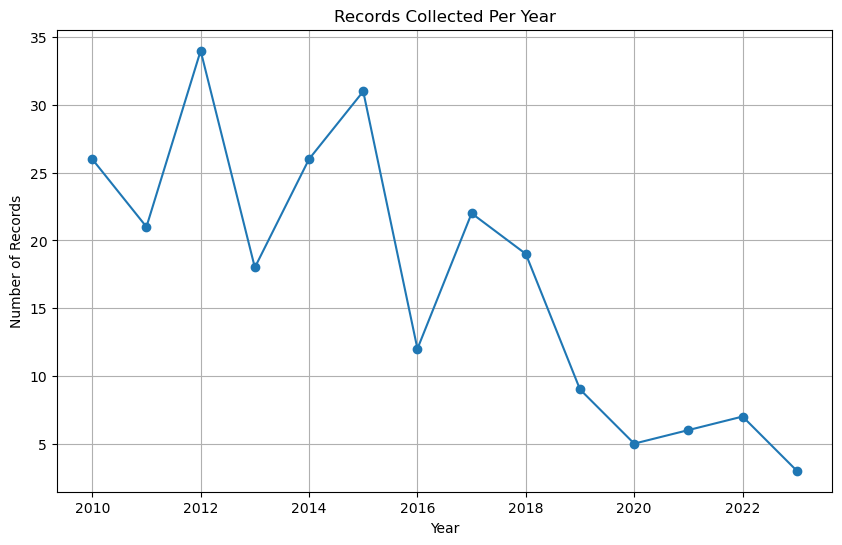

In [18]:
yearly_counts = filtered_do_df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Records Collected Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

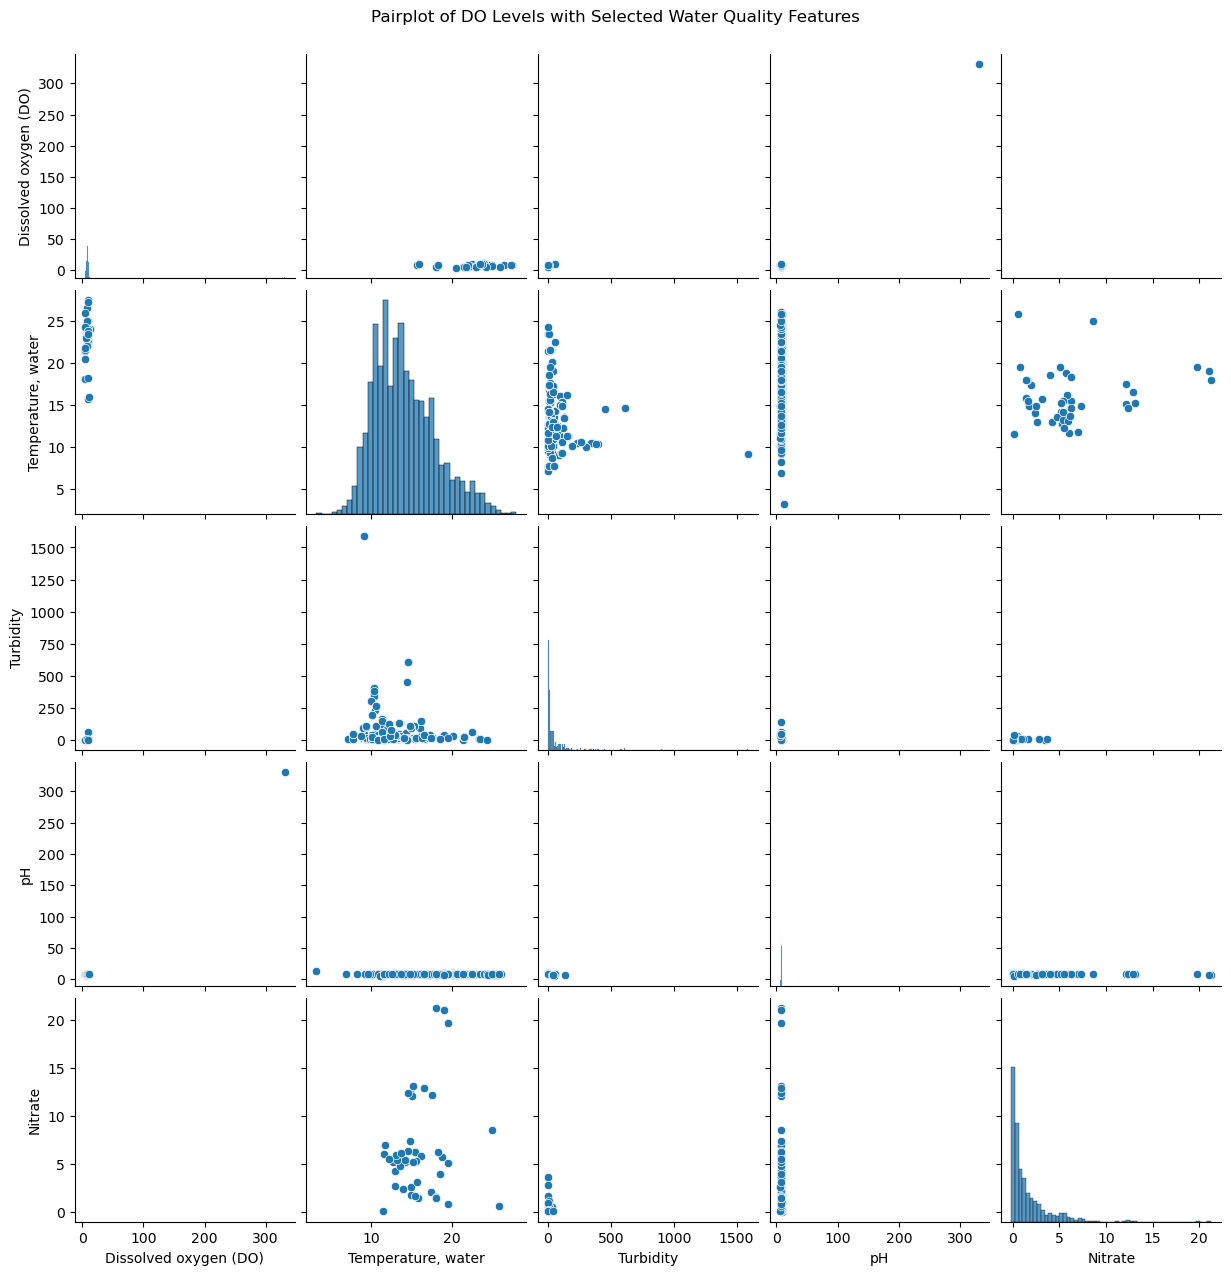

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.pairplot(do_pivoted_df_final, vars=['Dissolved oxygen (DO)', 'Temperature, water', 'Turbidity', 'pH', 'Nitrate'], kind='scatter')
plt.suptitle('Pairplot of DO Levels with Selected Water Quality Features', y=1.02)
plt.show()

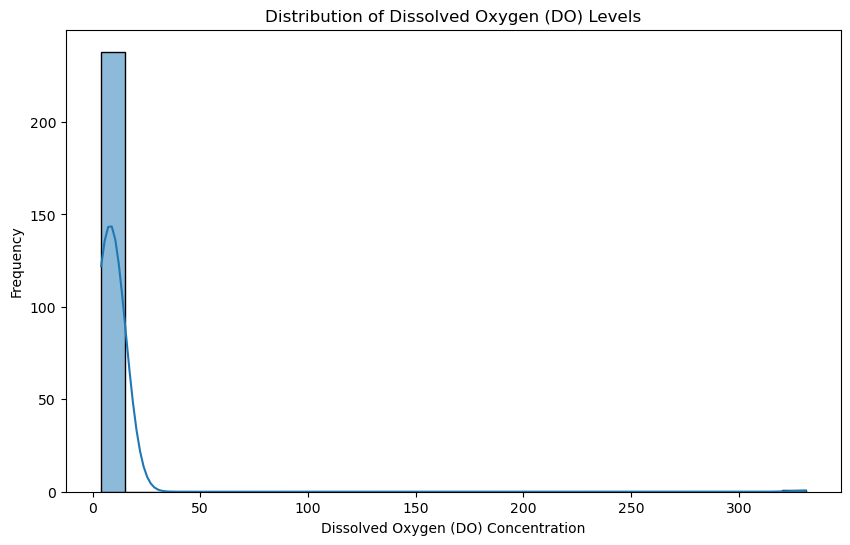

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(do_pivoted_df_final['Dissolved oxygen (DO)'], kde=True, bins=30)
plt.title('Distribution of Dissolved Oxygen (DO) Levels')
plt.xlabel('Dissolved Oxygen (DO) Concentration')
plt.ylabel('Frequency')
plt.show()

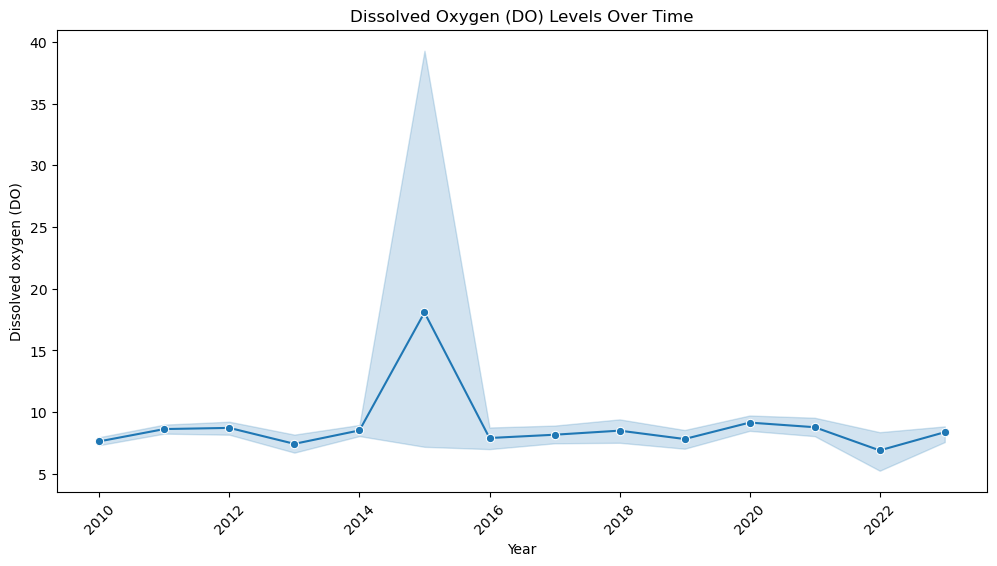

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Dissolved oxygen (DO)', data=do_pivoted_df_final, marker='o')
plt.title('Dissolved Oxygen (DO) Levels Over Time')
plt.xticks(rotation=45)
plt.show()

---

## <a id="forecasting-modeling"></a>Section 7: Forecasting and Prediction Modeling

---

### <a id="core-prediction"></a>Subsection 7.1: Core Prediction Question

---

### <a id="supporting-prediction"></a>Subsection 7.2: Supporting Question

#### <a id="part-1-missing-value-imputation-interpolation"></a>Part 1: Missing Value Imputation/Interpolation

In [20]:
# Inspect unique values in 'CharacteristicName' after cleaning
filtered_do_df.head()

,ActivityIdentifier,Ammonia,Chlorophyll a,Dissolved oxygen (DO),Nitrate,Specific conductance,"Temperature, water",Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure,Year,Month,Day,Weekday,Hour
915,CEDEN--2144010755,NaN,NaN,7.950000,NaN,NaN,NaN,NaN,7.950,WES_Mar21-Aug21,2021-05-11,NaN,-121.780,37.6399,2021,5,11,1,0
916,CEDEN--2144010806,NaN,NaN,7.450000,NaN,NaN,NaN,NaN,7.805,WES_Sep21-Feb22,2021-09-13,NaN,-121.780,37.6399,2021,9,13,0,0
928,CEDEN--2144150060,NaN,NaN,8.750000,NaN,NaN,NaN,NaN,8.390,ACCWP_CSM_WY2021,2021-06-23,NaN,-122.184,37.7256,2021,6,23,2,0
931,CEDEN--2144300667,NaN,NaN,7.900000,NaN,NaN,NaN,NaN,7.725,WES_Mar19-Aug19,2019-03-11,NaN,-121.780,37.6399,2019,3,11,0,0
932,CEDEN--2144300752,NaN,NaN,9.633333,NaN,NaN,NaN,NaN,8.145,WES_Mar20-Aug20,2020-08-11,NaN,-121.780,37.6399,2020,8,11,1,0


In [21]:
filtered_do_df['Nitrate']

915    NaN
916    NaN
928    NaN
931    NaN
932    NaN
        ..
2011   NaN
2013   NaN
2014   NaN
2017   NaN
2020   NaN
Name: Nitrate, Length: 239, dtype: float64

In [22]:
filtered_do_df.loc[:, 'Temperature, water'] = filtered_do_df['Temperature, water'].fillna(
    filtered_do_df['Temperature, water'].mean()
)

filtered_do_df.loc[:, 'Nitrate'] = filtered_do_df['Nitrate'].fillna(np.median(do_pivoted_df_final.dropna(subset=["Nitrate"])["Nitrate"]))
filtered_do_df.loc[:, 'Turbidity'] = filtered_do_df['Turbidity'].fillna(filtered_do_df['Turbidity'].median())
filtered_do_df.loc[:, 'pH'] = filtered_do_df['pH'].fillna(filtered_do_df['pH'].median())
filtered_do_df = filtered_do_df.drop("ActivityStartTime/Time_PST", axis=1)

In this step, I addressed missing values in the dataset and removed an unnecessary column to ensure the data is clean and suitable for analysis.

Imputation of Missing Values
Missing values in key numerical features were replaced using appropriate statistical measures to minimize bias and maintain data integrity:
Temperature, water: The mean was chosen as it preserves the average value of the column, assuming a relatively symmetric distribution. Nitrate:
Missing values were replaced with the median value of Nitrate from a related cleaned dataframe since the median is less affected by outliers, making it ideal for skewed data.
Turbidity and pH:
Missing values were replaced with the median value of their respective columns and median imputation ensures robustness in the presence of outliers.

Dropping Irrelevant Columns: The column ActivityStartTime/Time_PST was removed as it was deemed unnecessary for the analysis.


In [23]:
knn_imputer = KNNImputer(n_neighbors=5)
imputed_values = knn_imputer.fit_transform(filtered_do_df[['Temperature, water', 'Turbidity', 'pH', 'Nitrate']])
filtered_do_df.loc[:, 'Dissolved oxygen (DO)'] = imputed_values[:, 0]  # Assuming the imputed values are for the first column

Handling Missing Values with KNN Imputer

To ensure data quality and improve model performance, **missing values** in key features (`Temperature, water`, `Turbidity`, `pH`, `Nitrate`) were imputed using the **K-Nearest Neighbors (KNN) Imputer**. Unlike simple mean or median imputation, KNN considers the relationships between features, providing more accurate estimates for missing values.

**Why It Was Important**
- **Preserves Feature Relationships**: KNN imputation leverages patterns in the data, ensuring imputed values align with the relationships between features.
- **Improved Model Performance**: More reliable imputations reduce bias and variance in machine learning models.
- **Data-Driven Approach**: KNN imputes values based on the similarity of neighboring data points, making it superior to static methods (mean/median).

This step was crucial to ensure the dataset was complete and suitable for training machine learning models like Random Forest and XGBoost, ultimately enhancing prediction accuracy.


In [24]:
print(filtered_do_df.isnull().sum())

ActivityIdentifier         0
Ammonia                  177
Chlorophyll a            239
Dissolved oxygen (DO)      0
Nitrate                    0
Specific conductance     239
Temperature, water         0
Turbidity                  0
pH                         0
ProjectIdentifier          0
ActivityStartDate          0
LongitudeMeasure           0
LatitudeMeasure            0
Year                       0
Month                      0
Day                        0
Weekday                    0
Hour                       0
dtype: int64


#### <a id="part-2-train-test-split"></a>Part 2: Lagged Features, K-Fold Cross Validation, Train-Test Split, Initialize Models

In [25]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features and target
features = ['Temperature, water', 'Turbidity', 'pH', 'Year', 'Month', 'Nitrate']
target = 'Dissolved oxygen (DO)'

# Adding lag features
filtered_do_df.loc[:, 'DO_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])[target].shift(1)
filtered_do_df.loc[:, 'Temp_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['Temperature, water'].shift(1)
filtered_do_df.loc[:, 'Turb_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['Turbidity'].shift(1)
filtered_do_df.loc[:, 'pH_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['pH'].shift(1)

# Dropping rows with NaN values for lag features
filtered_do_df = filtered_do_df.dropna(subset=['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1'])

# Defining features (X) and target (y)
X = filtered_do_df[features + ['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1']]
y = filtered_do_df[target]

# K-fold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Initialize models
lin_reg = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Function to evaluate models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Cross-validation loop for each model
def cross_validate_model(model, X, y, kf):
    maes, mses, r2s = [], [], []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_val)
        
        # Evaluate the model
        mae, mse, r2 = evaluate_model(y_val, y_pred)
        maes.append(mae)
        mses.append(mse)
        r2s.append(r2)
    
    return np.mean(maes), np.mean(mses), np.mean(r2s)


##### **Model Training and Evaluation: Cross-Validation of Regression Models**

This section above trains and evaluates three regression models—**Linear Regression**, **Random Forest**, and **XGBoost**—to predict **Dissolved Oxygen (DO)** levels using various environmental features. The process includes adding temporal lag features, performing data preprocessing, and using **5-Fold Cross-Validation** for robust model evaluation.

---

##### **Key Steps**:
1. **Feature Engineering**:
   - Lag features for `DO`, `Temperature, water`, `Turbidity`, and `pH` are created to capture temporal dependencies in the data.
   - Rows with missing values due to lagging are dropped for clean training data.

2. **Model Setup**:
   - **Linear Regression**, **Random Forest**, and **XGBoost** are initialized and evaluated on the same feature set, which includes both current and lagged variables.

3. **K-Fold Cross-Validation**:
   - **5-Fold Cross-Validation** is used to split data into training and validation sets, ensuring that each model is evaluated on different subsets, enhancing the reliability of results.

4. **Model Evaluation**:
   - **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **R² Score** are used to assess the performance of each model.

---

##### **Importance**:
- The inclusion of lag features enhances model predictions by accounting for past environmental conditions.
- Cross-validation ensures that the model's performance is not overly optimistic, providing a more generalizable evaluation.

---


#### <a id="part-3-models"></a>Part 3: Models and Evaluation

In [26]:
# Cross-validation loop for each model
print("Linear Regression Evaluation:")
mae_lin_reg, mse_lin_reg, r2_lin_reg = cross_validate_model(lin_reg, X, y, kf)
print(f"MAE: {mae_lin_reg}, MSE: {mse_lin_reg}, R2: {r2_lin_reg}\n")

print("Random Forest Evaluation:")
mae_rf, mse_rf, r2_rf = cross_validate_model(rf_regressor, X, y, kf)
print(f"MAE: {mae_rf}, MSE: {mse_rf}, R2: {r2_rf}\n")

print("XGBoost Evaluation:")
mae_xgb, mse_xgb, r2_xgb = cross_validate_model(xgb_regressor, X, y, kf)
print(f"MAE: {mae_xgb}, MSE: {mse_xgb}, R2: {r2_xgb}")

Linear Regression Evaluation:
MAE: 3.551519489328635e-15, MSE: 2.0118472134765918e-29, R2: 1.0

Random Forest Evaluation:
MAE: 0.05470749548974606, MSE: 0.047134186200410676, R2: 0.9448870490267156

XGBoost Evaluation:
MAE: 0.04808420232794526, MSE: 0.04372548922419346, R2: 0.9268567794513836


#### **Model Evaluation Results**

The performance of three regression models—**Linear Regression**, **Random Forest**, and **XGBoost**—has been evaluated using **5-Fold Cross-Validation**. Below are the results for each model:

---

#### **Linear Regression**:
- **MAE**: 3.55e-15
- **MSE**: 2.01e-29
- **R²**: 1.0

**Interpretation**:  
Linear Regression achieved perfect performance with an **R² of 1.0**, indicating that the model explained all the variance in the target variable (**Dissolved Oxygen, DO**). The extremely low **MAE** and **MSE** values suggest that there are no significant errors in predictions. However, the perfect fit may indicate potential overfitting, or the linear relationship between the features and the target might be overly simplified.

---

#### **Random Forest**:
- **MAE**: 0.0547
- **MSE**: 0.0471
- **R²**: 0.9449

**Interpretation**:  
Random Forest performed well with an **R² of 0.945**, showing a strong correlation between the features and the target. While the **MAE** and **MSE** are slightly higher compared to Linear Regression, the Random Forest model captures more complex, non-linear relationships, making it more robust for real-world data.

---

#### **XGBoost**:
- **MAE**: 0.0481
- **MSE**: 0.0437
- **R²**: 0.9269

**Interpretation**:  
XGBoost also performed admirably with an **R² of 0.927**, similar to Random Forest. While it is slightly less accurate than the Random Forest model, it still provides a reliable prediction with reasonable error metrics. XGBoost's efficiency in handling large datasets and complex relationships makes it a strong contender, although it may not always outperform Random Forest in this case.

---

#### **Summary**:
- **Linear Regression** provided an idealized, near-perfect model, but it may be an overfit solution for this data.
- **Random Forest** and **XGBoost** both demonstrated strong predictive power with high **R²** values, though Random Forest outperformed XGBoost slightly.
- The results indicate that while all models performed well, Random Forest and XGBoost may offer better generalization and robustness compared to Linear Regression, particularly when dealing with complex, non-linear patterns in the data.

#### <a id="part-4-evaluation-visualization"></a>Part 4:  Visualization

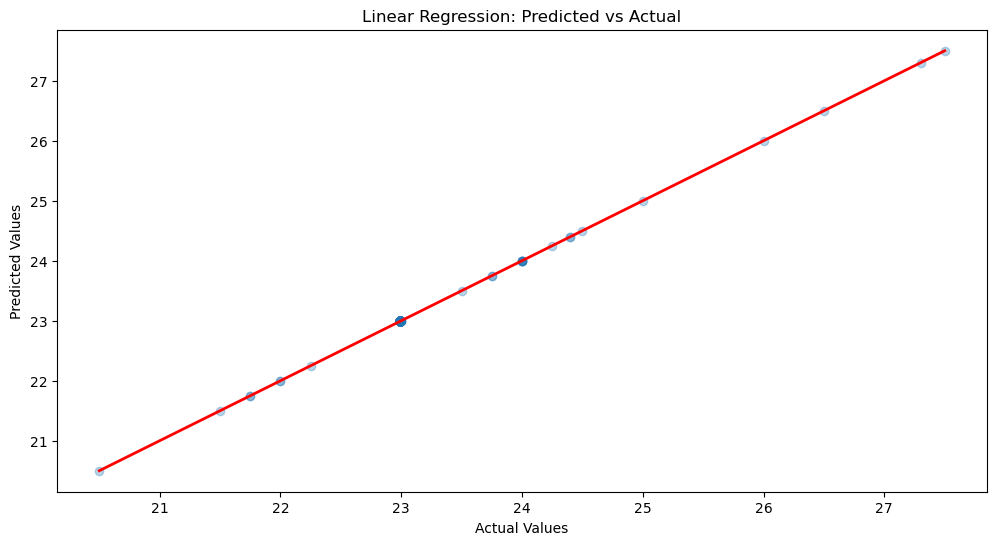

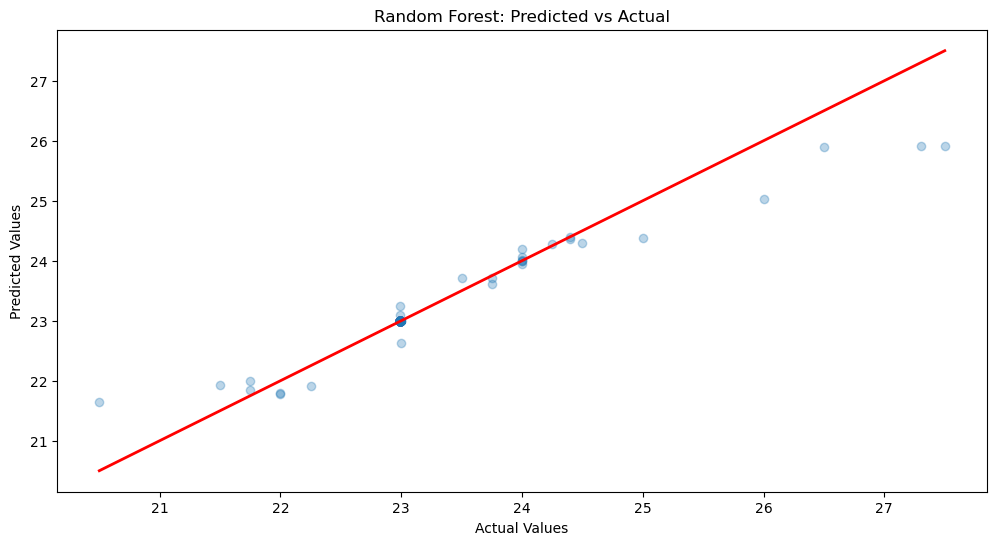

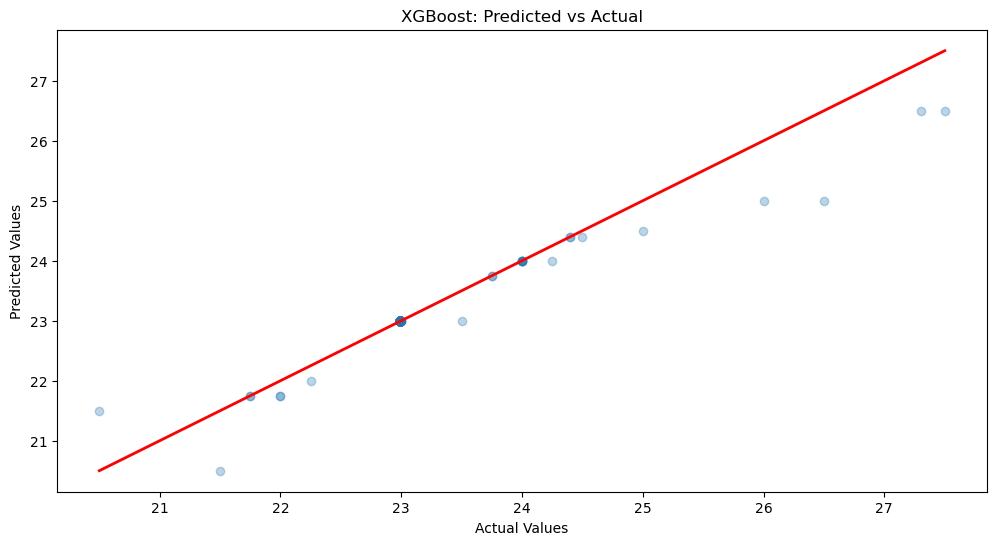

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the predicted vs actual values
def plot_predictions(y_true, predictions, model_name):
    plt.figure(figsize=(12, 6))
    
    # Scatter plot of predicted vs actual values
    plt.scatter(y_true, predictions, alpha=0.3)
    
    # Line for perfect prediction (y = predicted)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2)
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    
    plt.show()

# Function to collect predictions during cross-validation
def collect_predictions(model, X, y, kf):
    all_predictions = []
    all_actuals = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_val)
        
        # Collect predictions and actual values
        all_predictions.extend(y_pred)
        all_actuals.extend(y_val)
    
    return np.array(all_actuals), np.array(all_predictions)

# Collecting predictions for each model using cross-validation
y_actual_lin_reg, y_pred_lin_reg = collect_predictions(lin_reg, X, y, kf)
y_actual_rf, y_pred_rf = collect_predictions(rf_regressor, X, y, kf)
y_actual_xgb, y_pred_xgb = collect_predictions(xgb_regressor, X, y, kf)

# Visualizing the predictions for each model
plot_predictions(y_actual_lin_reg, y_pred_lin_reg, 'Linear Regression')
plot_predictions(y_actual_rf, y_pred_rf, 'Random Forest')
plot_predictions(y_actual_xgb, y_pred_xgb, 'XGBoost')

---

### <a id="temporal-prediction"></a>Subsection 7.3: Temporal Prediction Question

---

## <a id="conclusions"></a>Section 8: Interpretation and Conclusions

---

## <a id="references"></a>Section 9: Words Cited

---